<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Fundamental/%5BF-10%5DPokemon_with_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 학습 목표
- 다양한 피쳐가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피쳐에는 무엇이 있는지 생각해 본다.
- 모델 학습을 시작하기 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA를 진행한다.
- 모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행한다.
- 전체 데이터셋을 train/test 데이터셋으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교해본다.

### 목차
#### 1. 포켓몬, 그 데이터는 어디서 구할까
- 안녕, 포켓몬과 인사해!
- 포켓몬, 그 데이터는 어디서 구할까
- 포켓몬 데이터 불러오기

#### 2. 전설의 포켓몬? 먼저 샅샅이 살펴보자!
- 결측치와 전체 칼럼
- ID와 이름
- 포켓몬의 속성
- 모든 스탯의 총합
- 세부 스탯
- 세대

#### 3. 전설의 포켓몬과 일반 포켓몬, 그 차이는?
- 전설의 포켓몬의 Total값
- 전설의 포켓몬의 이름


#### 4. 모델에 넣기 위해! 데이터 전처리하기
- 이름의 길이가 10 이상인가?
- 이름에 자주 쓰이는 토큰 추출
- Type 1 & 2! 범주형 데이터 전처리하기

#### 5. 가랏, 몬스터볼!
- 가장 기본 데이터로 만드는 베이스라인
- 의사 결정 트리 모델 학습시키기
- 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?
- 의사 결정 트리 모델 다시 학습시키기

# 1 포켓몬, 그 데이터는 어디서 구할까
데이터셋: [Pokemon with stats(Kaggle)](https://www.kaggle.com/abcsds/pokemon)

- 포켓몬 게임에 대한 데이터이다.
- 총 11개의 피쳐가 있으며, 각각은 포켓몬의 ID, 이름, 첫 번째 속성, 두 번째 속성, 스탯의 총합, HP, 공격력, 방어력, 특수 공격력, 특수 방어력, 그리고 속도 이다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_path = "./drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

원본 데이터를 담은 변수를 그대로 사용하지 않고 그대로 놔둔다.<br>
원본 데이터를 복사해서 새로운 변수에 저장하여 사용한다.<br>
- 이유) 데이터를 다루면서 데이터셋에 다양한 작업을 할 것이기 때문에 원본 데이터는 훼손하지 않고 놔두기 위함

In [100]:
pokemon = original_data.copy()  # 원본 copy
print(pokemon.shape)            # 데이터셋의 크기(shape): 800행 13열
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [101]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [102]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 2 전설의 포켓몬? 먼저 샅샅이 살펴보자!

### 빈데이터(결측치) 확인하기

In [103]:
pokemon.isnull().sum()    # 칼럼별 결측치 개수 출력

# pokemon.isna().sum()도 같은 결과가 나온다.

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## 전체 칼럼 이해하기
- \# : 포켓몬 id number. 같은 포켓몬이지만 성별이 다른 경우 등은 같은 #값을 가진다. `int`
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로, 이름 데이터는 800개의 포켓몬이 모두 다르다. (unique) `str`
- type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. `str`
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. `str`
- Total : 전체 6가지 스탯의 총합. `int`
- HP : 포켓몬의 체력. `int`
- Attack : 물리 공격력. (scratch, punch 등) `int`
- Defense : 물리 공격에 대한 방어력. `int`
- Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) `int`
- Sp. Def : 특수 공격에 대한 방어력. `int`
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) `int`
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. `int`
- Legendary : 전설의 포켓몬 여부. !! Target feature !! `bool`

In [104]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [105]:
# 전체 데이터는 800개이므로 집합 크기를 통해 해당 칼럼은 unique하지 않음을 확인할 수 있다.
# 따라서, index로 쓸 수 없다.
print(len(set(pokemon["#"])))

# #(id number)가 중복되는 데이터 예시
pokemon[pokemon["#"] == 6]

721


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [106]:
len(set(pokemon["Name"]))     # Name칼럼의 데이터는 unique하다.

800

### 다양한 DataFrame 인덱싱 방법
링크: [파이썬 DataFrame 인덱싱 하는 방법(df[ ], df.loc[ ], df.iloc[ ])](https://bearwoong.tistory.com/65)

<br>
헷갈리는 거 정리!

>**df.loc에는 인덱스나 칼럼 명!!**<br>
>**df.iloc에는 인덱스 값이나 칼럼 값!! (0~n-1)**

In [107]:
pokemon.loc[[6, 10]]         # 6은 한 개의 속성, 10은 두 개의 속성을 가진다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


### Type1, 2 (속성)

In [108]:
print(len(set(pokemon["Type 1"])))     # 속성1 가짓수
print(len(set(pokemon["Type 2"])))     # 속성2 가짓수

# 속성2와 속성1 '차집합' 연산 = NaN
set(pokemon["Type 2"]) - set(pokemon["Type 1"])    # 따라서 속성1, 2에는 총 같은 속성 18가지가 있다.

18
19


{nan}

In [109]:
# 속성 18가지를 리스트로 저장

types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Poison', 'Bug', 'Rock', 'Ghost', 'Steel', 'Flying', 'Fire', 'Ground', 'Grass', 'Ice', 'Fairy', 'Fighting', 'Dark', 'Psychic', 'Water', 'Electric', 'Dragon']


**isna()함수:** 데이터가 비어있는 값(NaN)의 개수를 확인할 때 사용한다.

In [110]:
pokemon["Type 2"].isna().sum()        # 속성을 하나만 가지는 포켓몬의 수

386

**sns.countplot()**을 사용하여 일반 포켓몬과 전설 포켓몬 속성별 분포 비교

속성1 비교 결과:
> 일반 포켓몬에는 물(Water) 속성, 일반(Normal) 속성, 벌레(Bug) 속성 등이 많다.<br>
반면, 전설의 포켓몬에는 용(Dragon) 속성, 신령(Psychic) 속성이 많다.

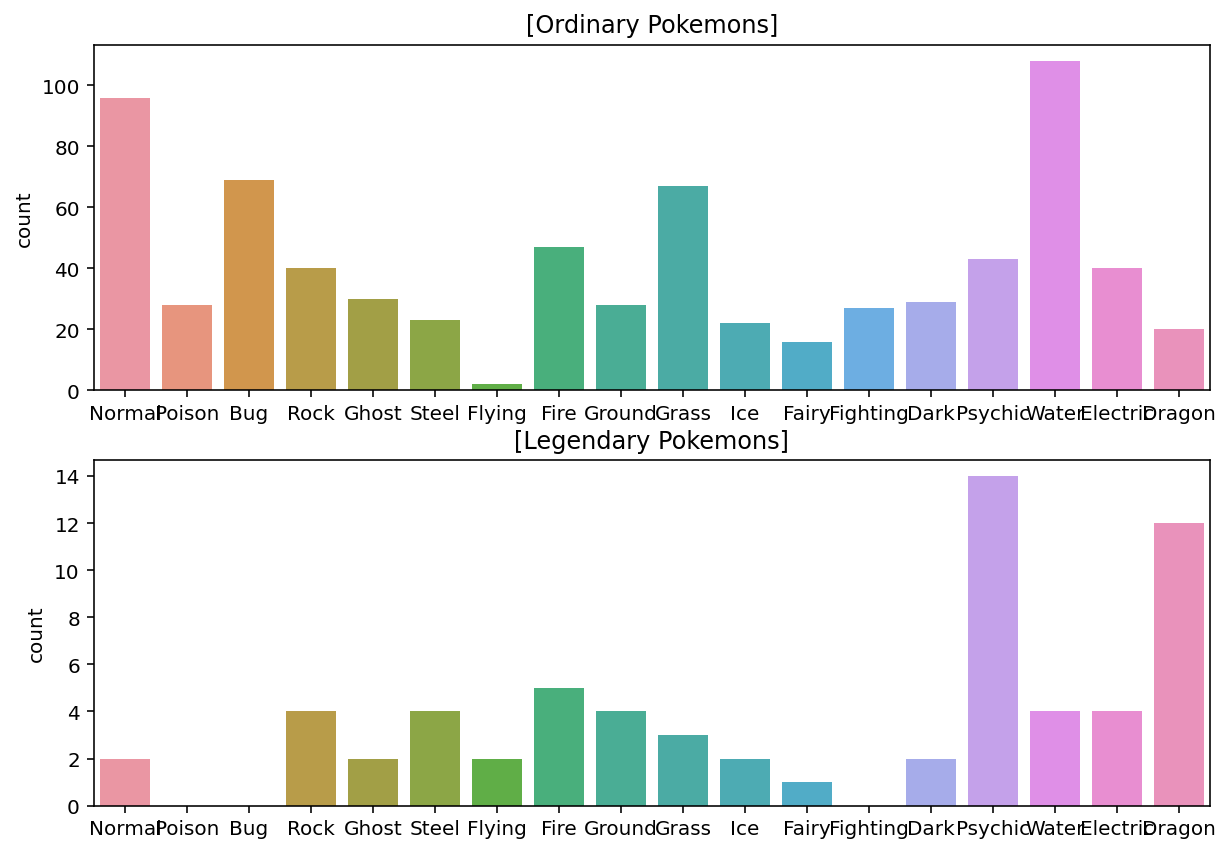

In [111]:
plt.figure(figsize=(10, 7))  # 그래프 크기

plt.subplot(211)  # 2x1에서 1번째에 그리기
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)  # 2x1에서 2번째에 그리기
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [112]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
# 예를 들어, Flying속성인 포켓몬 중 50%가 전설 포켓몬이다.
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


속성2 비교 결과:
> Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.<br>대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

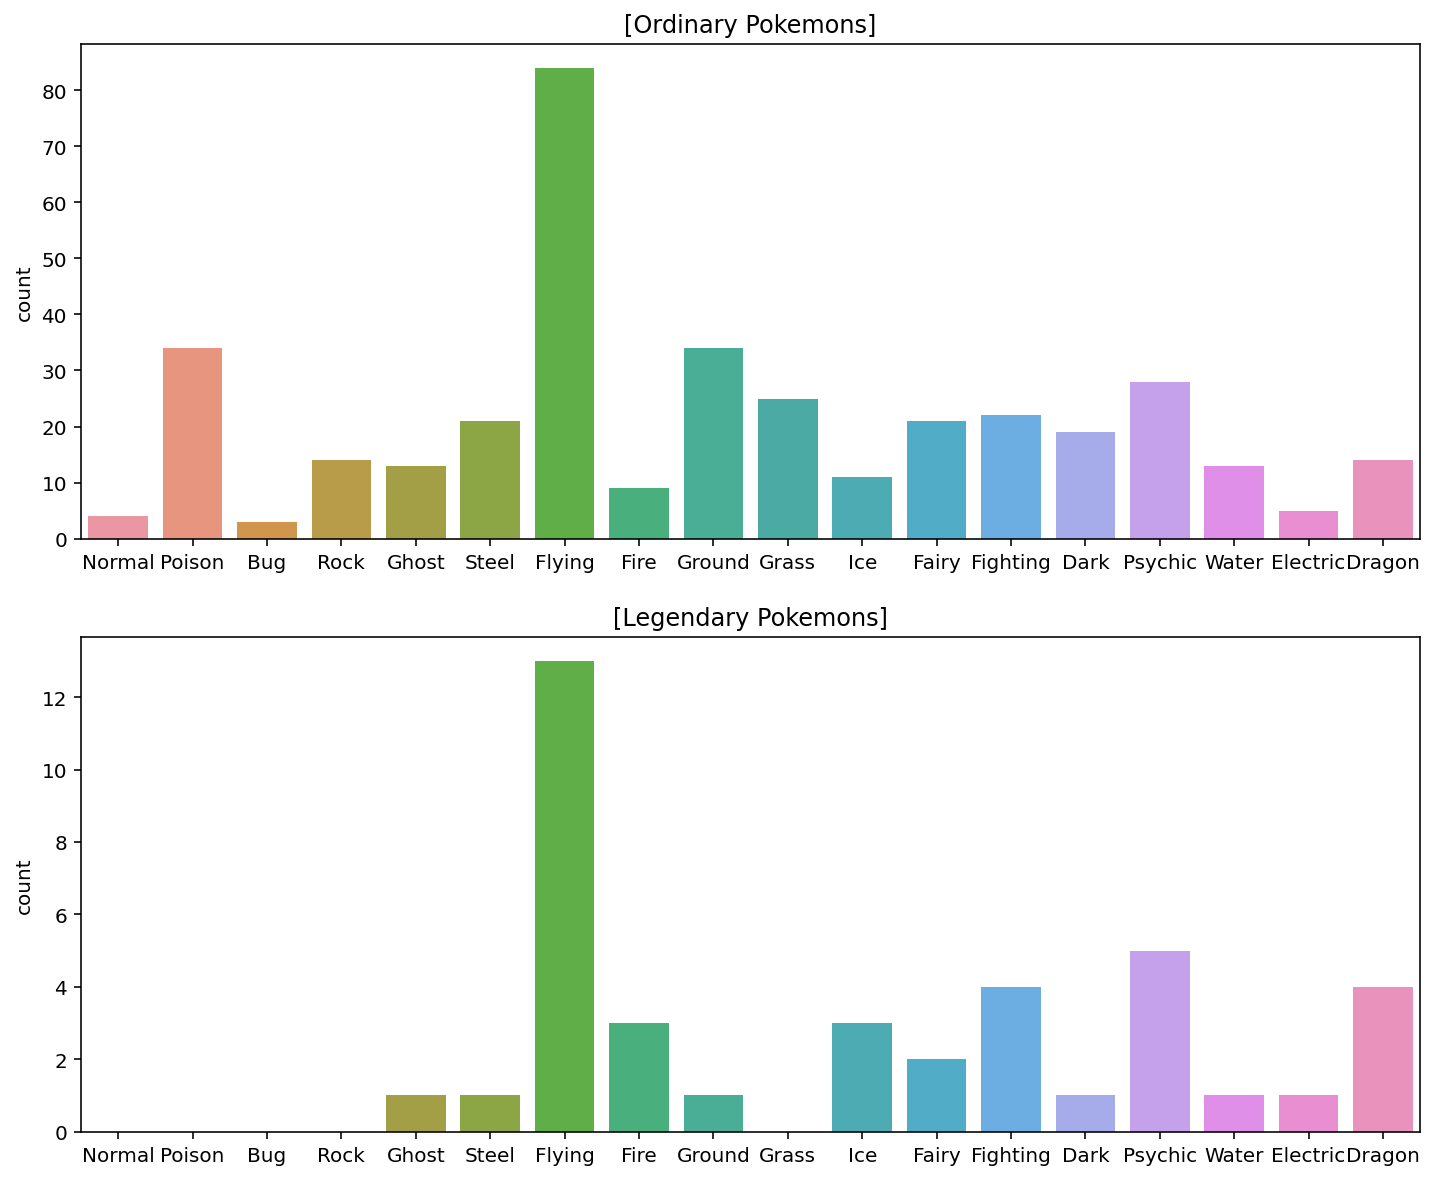

In [113]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [114]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
# 즉, Type2에서 25%가 전설 포켓몬이다.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


### 총 스탯 정보

In [115]:
# 모든 스탯의 종류(칼럼명)를 stats라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [116]:
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))      # 인덱스명이 0이고, 칼럼명이 Name인 데이터
print("total: ", int(pokemon.loc[0, "Total"]))                # 인덱스명이 0이고, 칼럼명이 Total인 데이터
print("stats: ", list(pokemon.loc[0, stats]))                 # 인덱스명이 0이고, 칼럼명이 stats에 해당하는 데이터
                                                              # stats는 칼럼명을 묶어 놓은 리스트.
print("sum of all stats: ", sum(list(pokemon.loc[0, stats]))) # 해당 포켓몬의 stats 총합

# total과 직접 6가지 stat을 합한 값이 같은지 확인

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [117]:
# 모든 포켓몬을 대상으로 total 값과 직접 6가지 stat을 합한 값이 같은지 확인

sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))    # sum(axis=1)을 함으로써 가로방향(같은행)끼리 합한다.

800

아래 그래프를 통해 **전설의 포켓몬은 주로 Total 스탯 값이 높다**는 사실을 확인할 수 있다.

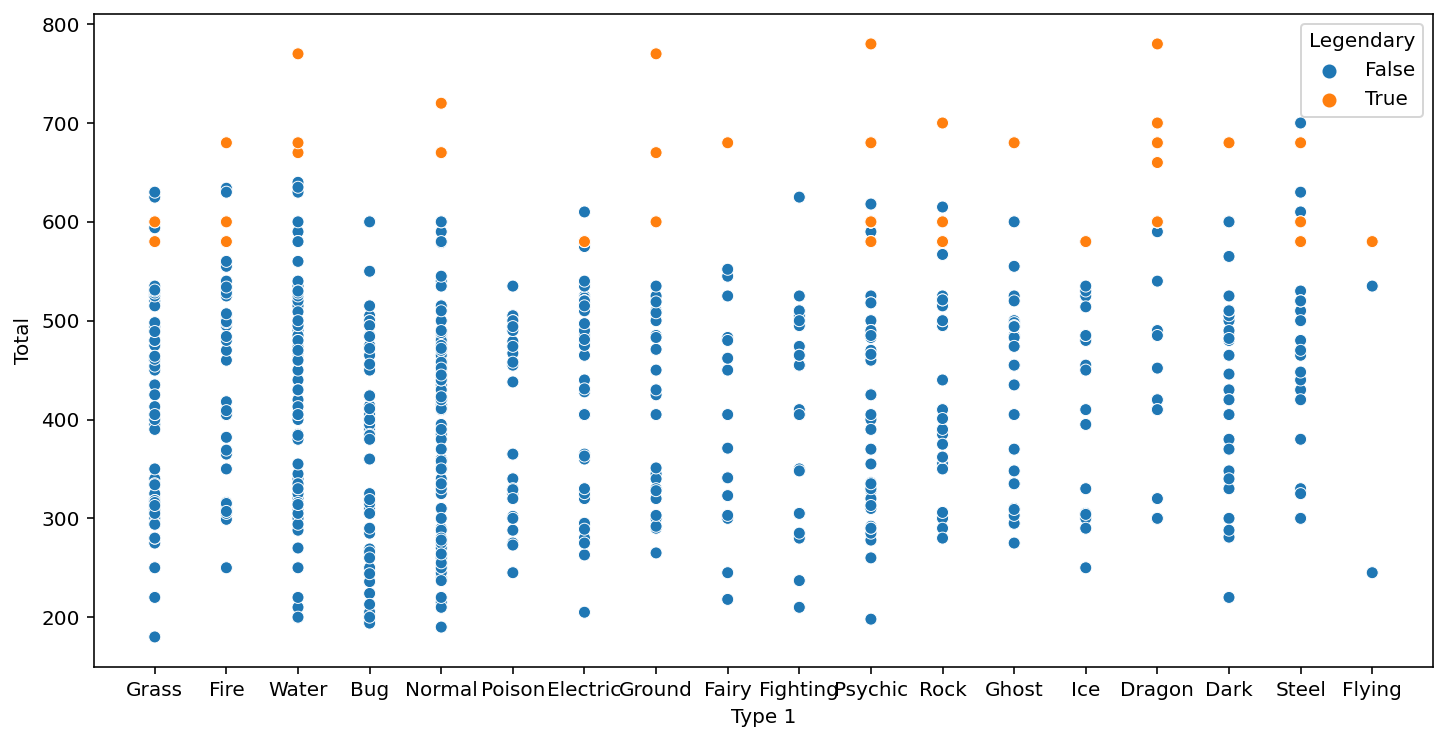

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 그래프 크기 조정

# x축은 속성1, y축은 총 스탯 합
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")   # hue를 통해 다른 색상으로 표현할 기준을 설정. (기준: Legendary)
plt.show()

### 6가지 세부 스탯 정보
세부스탯: HP / Attack / Defense / Sp. Atk / Sp. Def / Speed

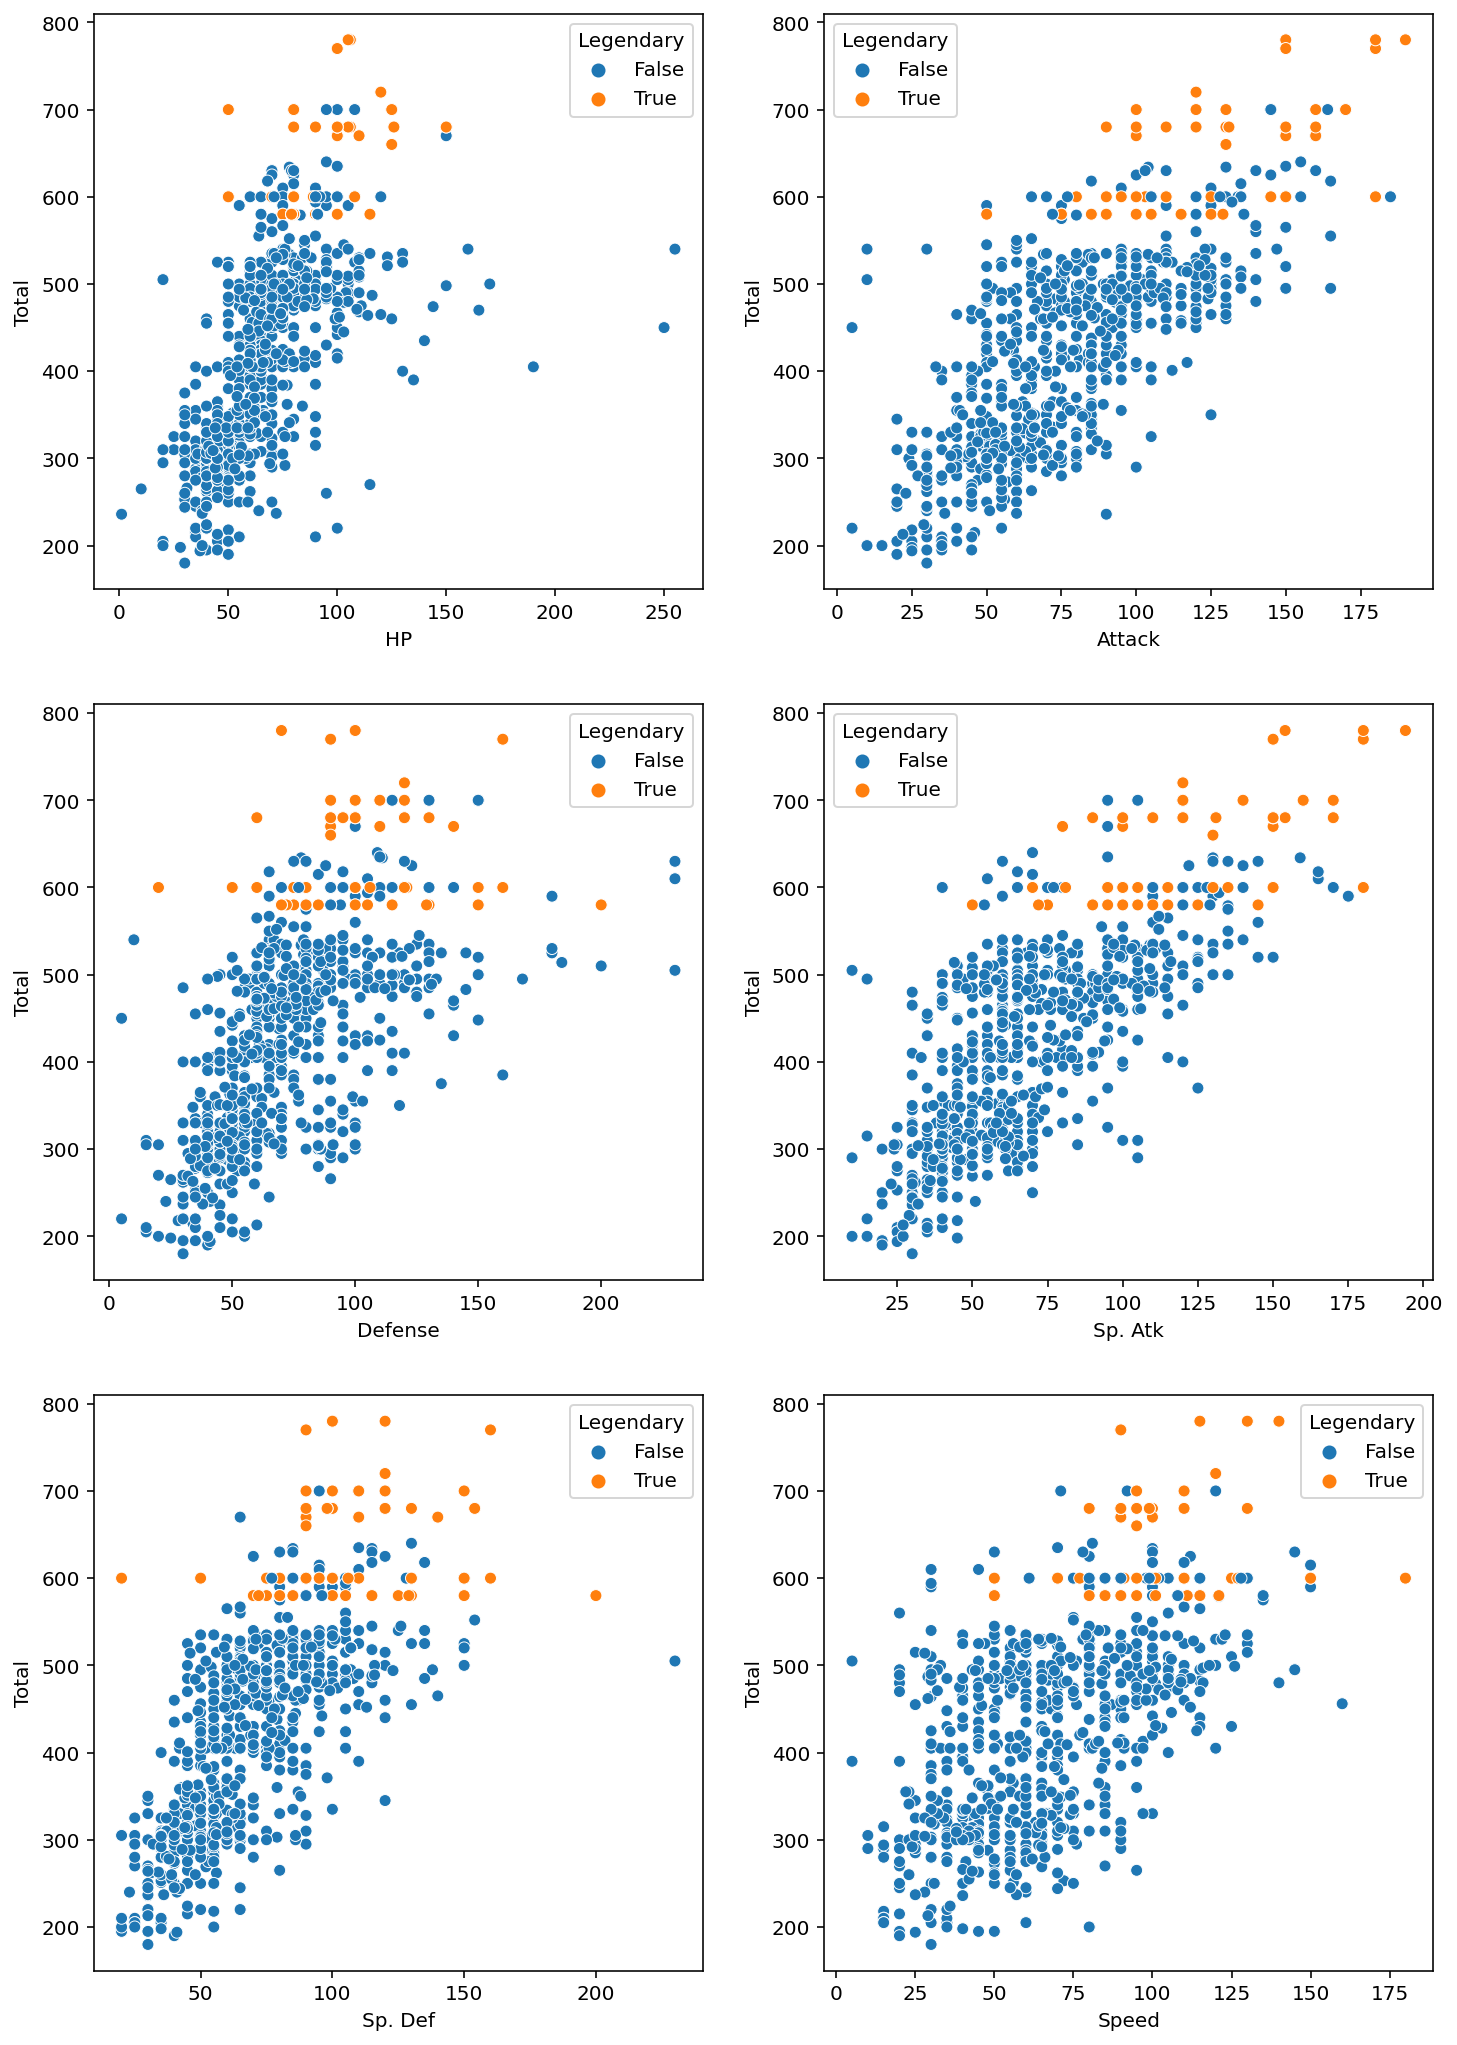

In [119]:
# 산점도 그리기
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 그래프 크기 조정

# hue를 통해 Legendary여부에 따라 점 색상을 달리함.
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

### 각 스탯에 대한 분석
`HP`, `Defense`, `Sp`. `Def`
- 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있었다.<br>그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다.<br>**(그래프의 위쪽에 분포하지만 가운데 정도에 분포)**

<br>

`Attack`, `Sp. Atk`, `Speed`
- 이 세 가지 스탯은 Total과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다. <br> **(그래프의 오른쪽 위에 대부분 분포)**

### Generation : 포켓몬의 세대
현재 데이터셋에는 1~6세대의 포켓몬이 존재한다.<br><br>
**분석 결과:** 전설의 포켓몬은 3세대부터 많아졌다가, 6세대에 다시 줄어든다.

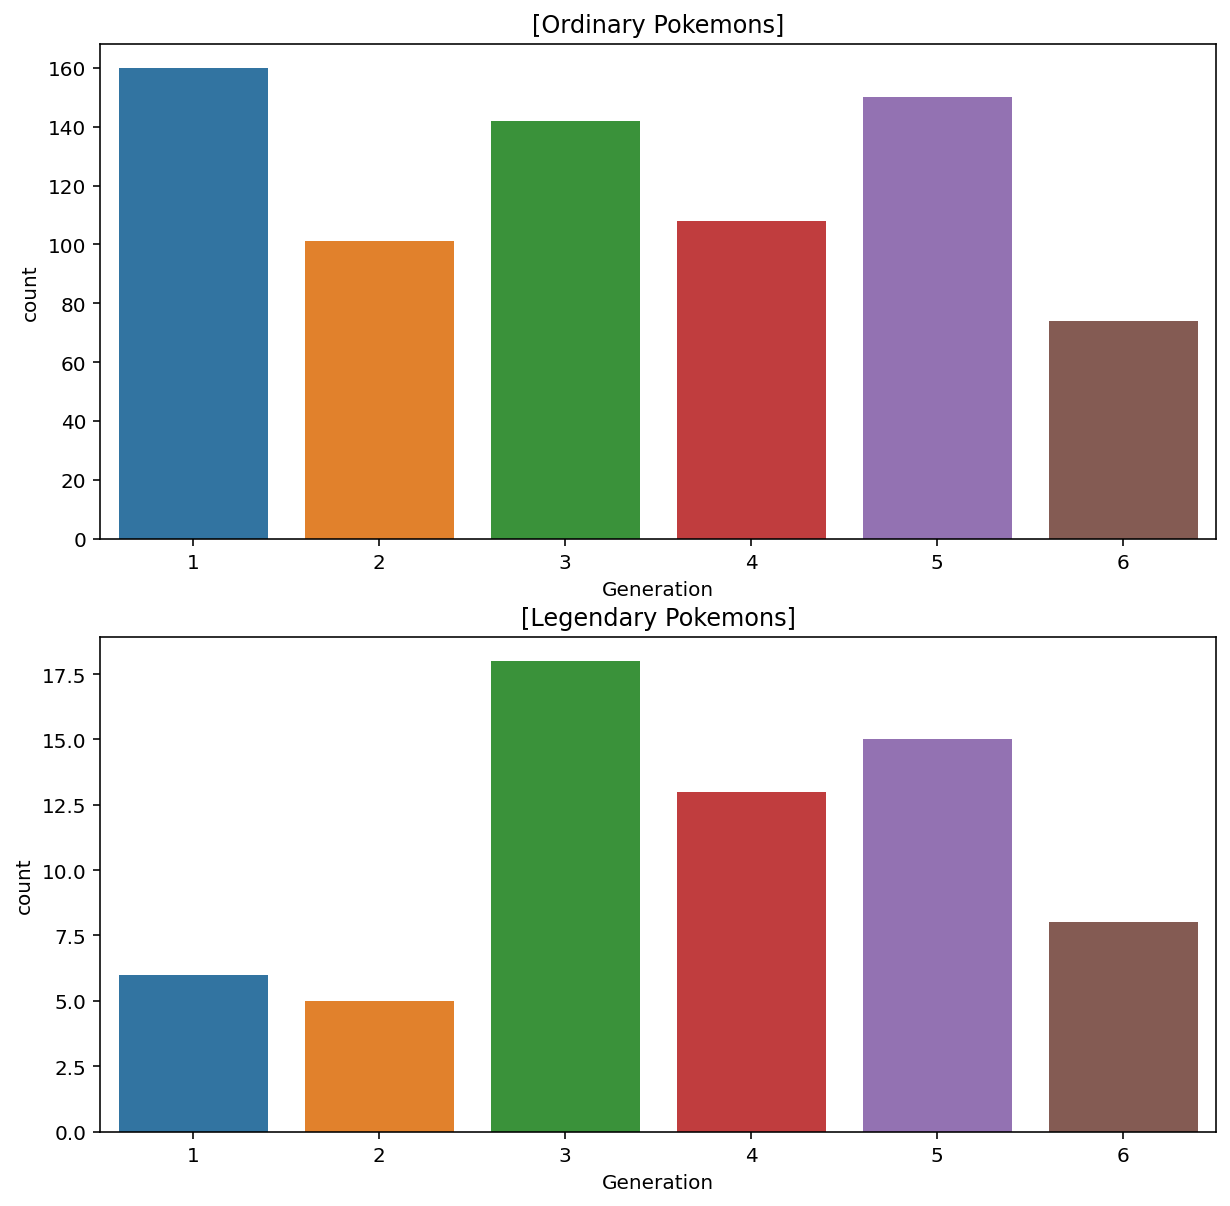

In [120]:
plt.figure(figsize=(10, 10))   # 그래프 크기

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation")
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation")
plt.title("[Legendary Pokemons]")
plt.show()

# 3 전설의 포켓몬과 일반 포켓몬, 그 차이는?

**legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석**
### 1) 전설 포켓몬의 Total값

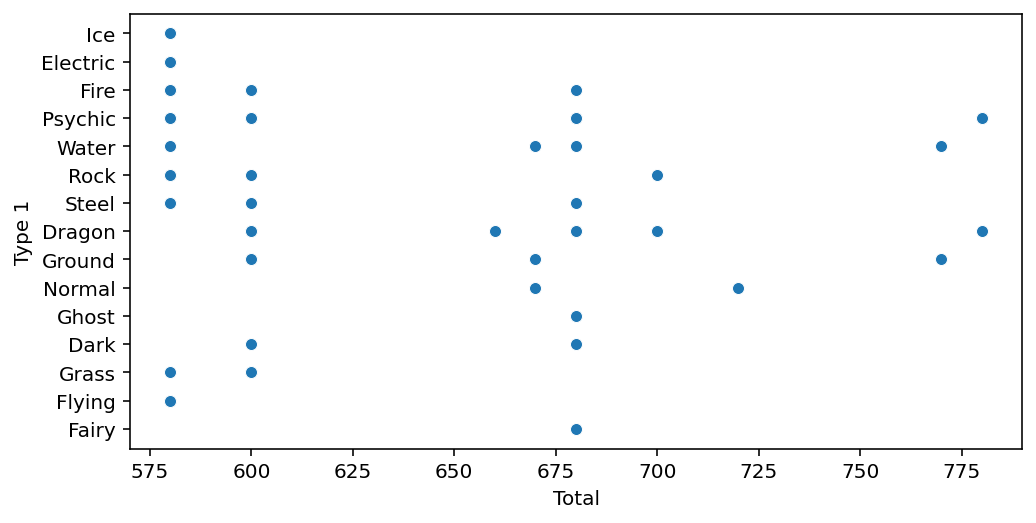

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [122]:
# 그래프에서 total값이 몇 군데 몰려있는 것을 확인하고
# total값의 종류를 확인해 보았더니, 총 9가지로 나뉜다.
sorted(list(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

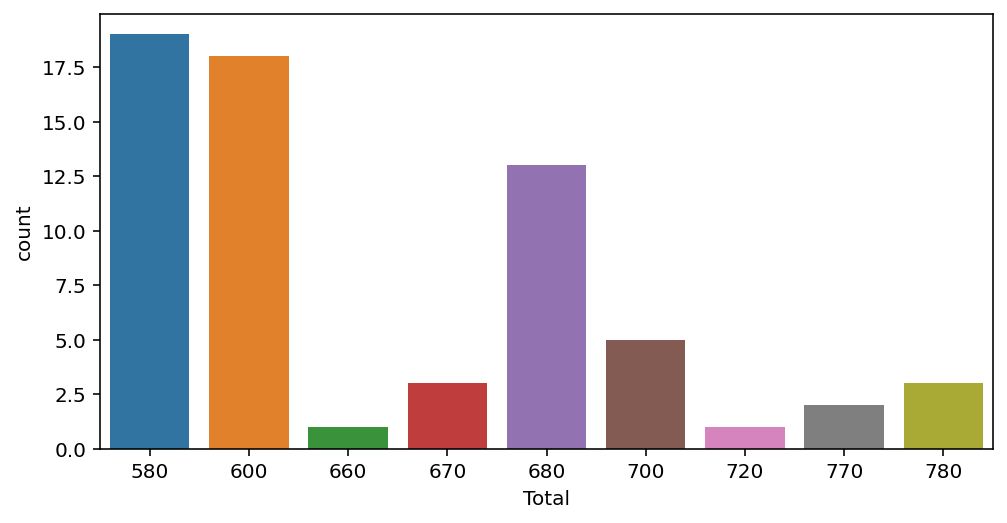

In [123]:
# 위의 결과를 더 구체적으로 그래프로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [124]:
round(65 / 9, 2)        # 약 7.22마리마다 서로 같은 total값을 가진다는 것을 의미한다.

7.22

### 2) 일반 포켓몬의 Total값

In [125]:
print(sorted(list(set(ordinary["Total"]))))
len(sorted(list(set(ordinary["Total"]))))      # Total값이 총 195가지로 나뉜다.

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


195

In [126]:
round(735 / 195, 2)     # 약 3.77마리마다 같은 total값을 가진다.

3.77

### Total값 분석 결과
**한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부**는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.<br>
예를 들어, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다.<br><br>

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있다.

### 전설 포켓몬의 이름 분석
### 전설 포켓몬 데이터셋 legendary에서 일부 추출
특정 단어가 들어가 있는 이름이 많은 것을 확인한다.<br>
예) 'Mewtwo', 'Latias', 'Kyogre', 'Groudon', 'Forme', 'Kyurem' 등

In [127]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)    # pd.concat을 사용하여 데이터프레임을 연결
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [128]:
# 위의 전설 포켓몬 이름 중 Forme를 포함한 데이터를 추출
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


legendary와 ordinary 각 데이터에 모두 이름의 길이를 나타내는 **"name_count"컬럼을 추가**한다.

<br><br>
**pandas의 apply함수**<br>
- DataFrame.apply(func,axis=0,raw=False,result_type=None,args=(), \*\*kwds)<br>

매개변수 설명:
- func:	각 행 또는 열에 적용 할 기능
- axis:	row(axis = 0) 또는column (axis = 1)을 따라 함수 적용
- raw:	부울. Series 객체 (raw = False) 또는ndarray 객체 (raw = True)로 전달 된 행 / 열
- result_type:	{'expand', 'reduce', 'broadcast', 'None'} 중 선택. axis=1 (열)에만 적용 가능한 연산 출력 유형
- args:	함수func의 위치 인수입니다.
- \*\*kwds:	함수func의 키워드 인수입니다.

<br>

[참고](https://www.delftstack.com/ko/api/python-pandas/pandas-dataframe-dataframe.apply-function/)

In [129]:
# 'name_count'칼럼 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [130]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


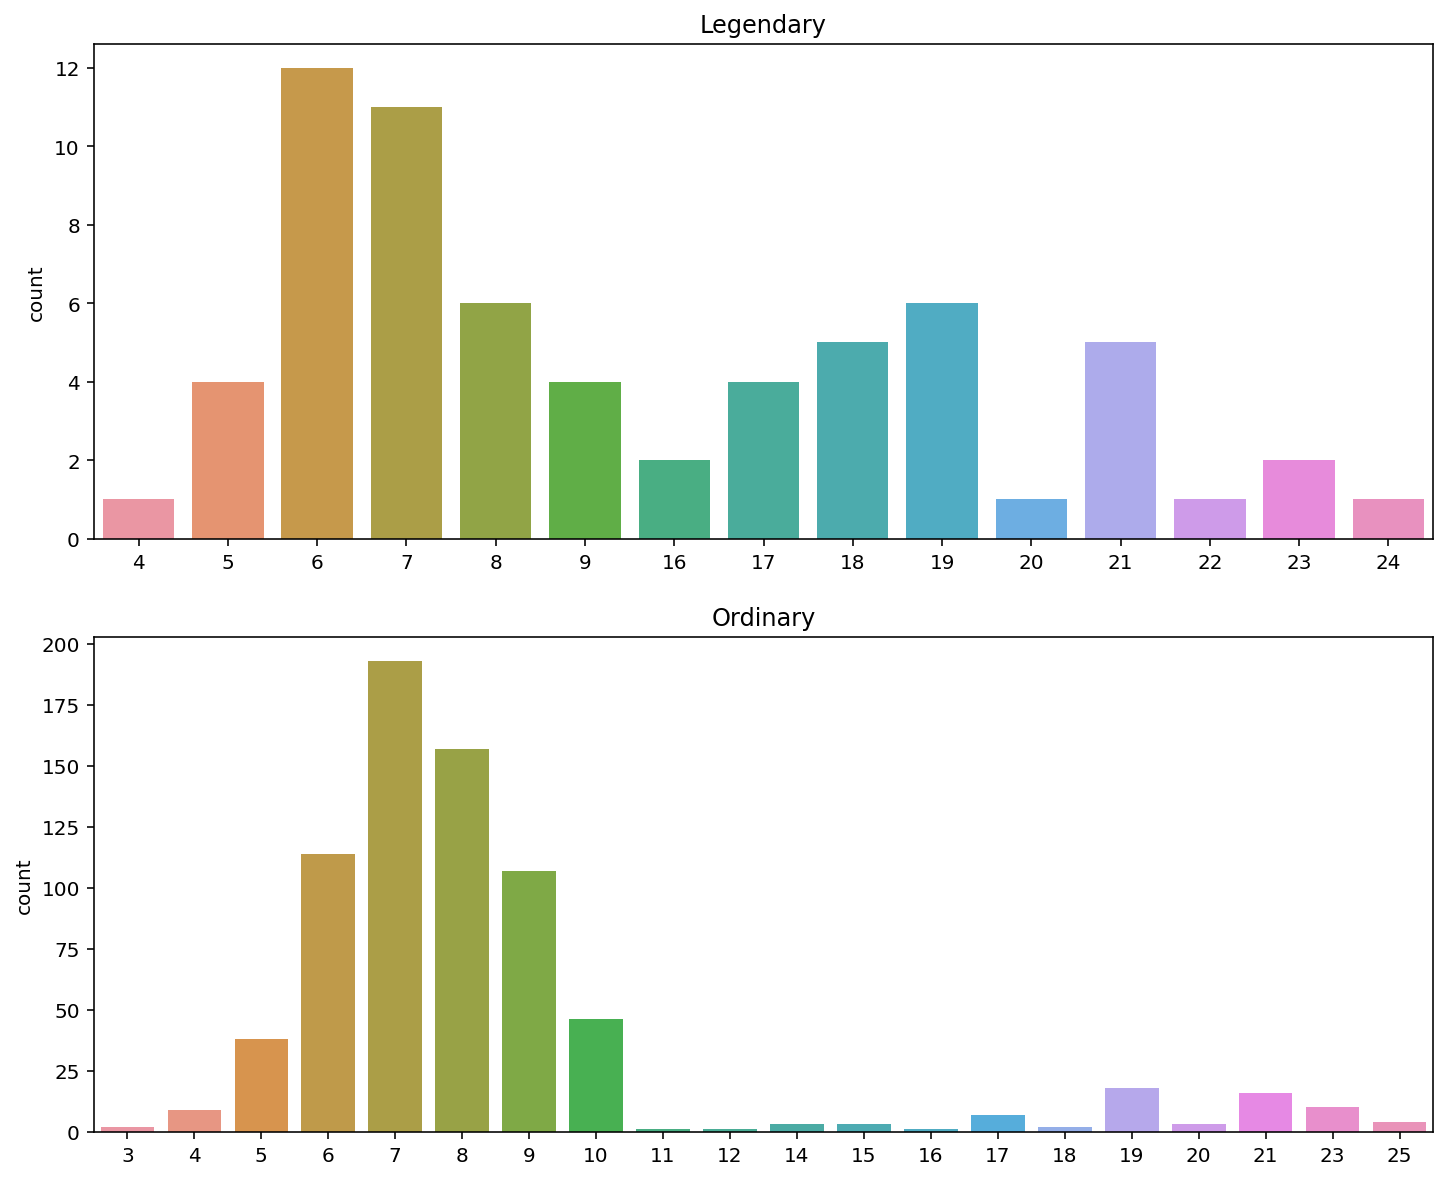

In [131]:
plt.figure(figsize=(12, 10))   # 그래프 크기

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')   # 전설포켓몬의 이름길이 분포
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')    # 일반포켓몬의 이름길이 분포
plt.title("Ordinary")
plt.show()

In [132]:
# 전설포켓몬 중 이름 길이가 10이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [133]:
# 일반포켓몬 중 이름 길이가 10이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


### Name 분석 결과
- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

### [의문]
위의 분석 결과가 전설포켓몬인지 구분할 때 왜 의미있는지 이해가 안된다. 전설포켓몬과 일반포켓몬의 이름 길이 분포 각각이 아니라 **전체 이름 길이 분포에서** 전설 포켓몬이 많이 해당하는 이름 길이를 살펴보는게 두 그룹을 비교하는 데 더 유용하지 않나 생각한다.

# 4 모델에 넣기 위해! 데이터 전처리하기
데이터 분석을 통해 머신러닝을 수행하고 싶다면, 데이터를 모델에 입력할 수 있는 형태로 변환하는 것이 매우 중요하다.<br><br>
지금까지 수행한 EDA 결과에 따라 **이름 컬럼**을 모델이 연산할 수 있는 형태로 처리를 해보자.<br>


1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

In [134]:
# 이름의 길이 데이터를 저장하는 칼럼 추가
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [135]:
# 이름 길이가 10이상이면 True, 아니면 False
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


### 이름에 어떤 토큰이 있으면 전설 포켓몬일 확률이 높을까?

포켓몬의 이름은 4가지 타입으로 나뉜다.
1. 한 단어. <br> (ex. Venusaur)
2. 두 단어. 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉜다. <br> (ex. VenusaurMega Venusaur)
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 4. 성별을 표시하는 경우 <br> (ex. CharizardMega Charizard X)
4. 알파벳이 아닌 문자를 포함하는 경우 <br> (ex. Zygarde50% Forme)

In [136]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [137]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [138]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [139]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


"Name_nospace"칼럼: 이름에서 공백을 제거<br>
"name_isalpha"칼럼: "Name_nospace"칼럼의 값들에 대한 isalpha()결과
- 값이 False인 행을 출력했을 때 아무것도 출력되지 않는다. => 모든 이름이 알파벳으로 이루어져 있다. 

In [140]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
print(pokemon["Name_nospace"])

pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

0                 Bulbasaur
1                   Ivysaur
2                  Venusaur
3      VenusaurMegaVenusaur
4                Charmander
               ...         
795                 Diancie
796      DiancieMegaDiancie
797      HoopaHoopaConfined
798       HoopaHoopaUnbound
799               Volcanion
Name: Name_nospace, Length: 800, dtype: object


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
문자열을 처리하기 위해 정규표현식을 사용한다.

In [141]:
import re

In [142]:
name = "CharizardMega Charizard X"

split함수를 이용하여 공백 기준으로 분리한다.

In [143]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

대문자로 시작해서 소문자로 끝나는 패턴을 찾는다.

In [144]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

공백 기준 분리, 정규표현으로 패턴 찾는 과정을 수행하는 tokenize함수를 작성한다.
- 토큰을 ndarray로 반환한다.

In [145]:
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

"Name"칼럼의 데이터들에 대해 tokenize함수를 수행하여 결과를 리스트에 저장한다.

In [146]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

collections모듈에 있는 Counter를 사용하면 리스트에 있는 요소들이 각각 몇 개있는지 확인할 수 있다.

In [147]:
from collections import Counter

# 사용 예시
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
print(Counter(a))
Counter(a).most_common()          # 튜플을 원소로 가지는 리스트를 반환

Counter({1: 4, 0: 3, 2: 1, 3: 1})


[(1, 4), (0, 3), (2, 1), (3, 1)]

In [148]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

**문자열 메소드 contains**를 사용하면 문자열에 특정 구문이 포함되어 있는지 쉽게 확인할 수 있다.

In [149]:
for token, _ in most_common:
    print(token)
    pokemon[token] = pokemon["Name"].str.contains(token)   # True 또는 False

pokemon.head(10)

Forme
Mega
Mewtwo
Kyurem
Deoxys
Hoopa
Latias
Latios
Kyogre
Groudon


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,10,True,Charmeleon,True,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,9,False,Charizard,True,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,25,True,CharizardMegaCharizardX,True,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,25,True,CharizardMegaCharizardY,True,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,8,False,Squirtle,True,False,False,False,False,False,False,False,False,False,False


### Type 1 & Type 2: 범주형 데이터 전처리하기
Type은 한 가지 속성을 가지느냐, 두 가지를 가지느냐에 따라 NaN값이 있을 수도 없을 수도 있다. <br>
다음과 같은 규칙으로 범주형 데이터를 전처리해준다.
- 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)한다.
- 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 한다.


In [150]:
print(types)

['Normal', 'Poison', 'Bug', 'Rock', 'Ghost', 'Steel', 'Flying', 'Fire', 'Ground', 'Grass', 'Ice', 'Fairy', 'Fighting', 'Dark', 'Psychic', 'Water', 'Electric', 'Dragon']


[pandas의 == 문법](https://pandas.pydata.org/docs/user_guide/basics.html#comparing-if-objects-are-equivalent)

In [151]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Normal,Poison,Bug,Rock,Ghost,Steel,Flying,Fire,Ground,Grass,Ice,Fairy,Fighting,Dark,Psychic,Water,Electric,Dragon
0,Grass,Poison,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,Grass,Poison,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,Grass,Poison,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Grass,Poison,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# 5 가랏, 몬스터볼!

### 가장 기본 데이터로 베이스라인(Baseline)을 만들자
**베이스라인 모델이란 가장 기초적인 방법으로 만든 모델**입니다. <br>
베이스라인 모델은 성능은 안 좋을지 모르지만, **성능 하한선을 제공**함으로써 우리가 새롭게 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있게 도와줍니다

In [152]:
# 원본데이터 사용

print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


칼럼을 확인해보자.
- 다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용할 것이다.

In [153]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

X변수에 features칼럼에 해당하는 데이터를 담는다.<br>
y변수에는 target칼럼에 해당하는 데이터를 담는다.

In [154]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [155]:
target = 'Legendary'

y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

sklearn의 train_test_split함수를 사용해서 훈련 데이터와 학습 데이터를 분리한다.
- 학습 데이터에는 640개의 데이터가
- 테스트 데이터에는 160개의 데이터가 들어간다.

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 의사결정트리 모델 학습시키기
sklearn의 DecisionTreeClassifier를 사용한다.

In [157]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)   # 모델 정의
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [158]:
model.fit(X_train, y_train)       # 모델 학습
y_pred = model.predict(X_test)    # 결과 예측

In [159]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)  # 모델 평가

array([[144,   3],
       [  5,   8]])

전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었다.

<br>

이는 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞추고 들어가기 때문에 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다.

<br>

따라서 이번 데이터셋에서는 **정확도(accuracy)로 모델의 성능을 평가하는 것은 거의 의미가 없다.**

In [160]:
len(legendary)

65

이번 데이터와 같은 **불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요하다.** <br>
즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하다.

Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.

In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



### 피쳐 엔지니어링(Feature Enginerring) 데이터로 학습시키면 얼마나 차이가 날까?

지금까지 우리는 굉장히 다양한 특성들을 새로 만들어주거나 전처리하는 등 피쳐 엔지니어링(Feature Engineering)을 진행했다.<br>그렇다면 그 데이터들을 모두 활용하면 얼마나 차이가 날까?

In [162]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Normal', 'Poison', 'Bug', 'Rock', 'Ghost', 'Steel', 'Flying', 'Fire',
       'Ground', 'Grass', 'Ice', 'Fairy', 'Fighting', 'Dark', 'Psychic',
       'Water', 'Electric', 'Dragon'],
      dtype='object')


원래 13개밖에 안 되었던 **컬럼이 우리의 전처리를 통해 45개로 늘어났다.** <br>
그렇다면 이 중 모델에 넣어 분류하기 위해 **제외해야 할 컬럼들**은 무엇일까?

<br>

<u>머신러닝 모델에 문자열을 입력할 수 없다</u>는 사실을 기반으로 정한다.
- **"#"** : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외한다.
- **"Name"** : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었다.
- **"name_nospace", "name_isalpha"** : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않다.
- **"Type 1" & "Type 2"** : 속성은 원-핫 인코딩으로 처리했다.
- **"Legendary"** : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용한다.

In [163]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [164]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon,Poison,Water,Steel,Grass,Bug,Normal,Fire,Fighting,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


전설 포켓몬을 분류하는 모델을 만들기 위함이므로 target칼럼은 "Legendary"이다.

In [165]:
target = "Legendary"
target

'Legendary'

In [166]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

훈련데이터, 테스트데이터 분리

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### 의사결정트리 모델 다시 학습시키기

In [168]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [173]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [170]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

위에서 약 0.62에 그쳤던 recall값이 무려 0.92로까지 올랐다!!

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [172]:
# 보충 설명
pokemon.loc[pokemon["Type 1"] == "Flying", ['Name', 'Type 1','Type 2','Legendary']]

,Name,Type 1,Type 2,Legendary
702,TornadusIncarnate Forme,Flying,NaN,True
703,TornadusTherian Forme,Flying,NaN,True
790,Noibat,Flying,Dragon,False
791,Noivern,Flying,Dragon,False
